# Análisando os Dados dos Pokémons

In [447]:
# Importando as bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
# Importando o Dataset
pokemonData = pd.read_csv("https://raw.githubusercontent.com/pWillOliveira/PokemonDataCience/master/Dataset/Dataset%20-%20Dados%20dos%20Pokemons.csv")

In [448]:
# Vizualisando as colunas do Dataset
pokemonData.columns.values

array(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
       'Legendary'], dtype=object)

In [449]:
# Criando um array para armazenar as chaves das colunas
chaves = []
 
# Percorrendo as colunas do dataset e adicionando ao array
for coluna in pokemonData:
    chaves.append(coluna)
 
# Mostrar as chaves
print(chaves)

['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


In [450]:
# Somando a quantidade de Pokémons Lendários
legendary = pokemonData['Legendary'].value_counts()

print(legendary)

False    735
True      65
Name: Legendary, dtype: int64


In [480]:
# Verificando os tipos dos Pokémons
type1 = pokemonData['Type 1'].value_counts().sort_index()
type2 = pokemonData['Type 2'].value_counts().sort_index()

total_types = type1 + type2

print(total_types)

Bug          72
Dark         51
Dragon       50
Electric     50
Fairy        40
Fighting     53
Fire         64
Flying      101
Ghost        46
Grass        95
Ground       67
Ice          38
Normal      102
Poison       62
Psychic      90
Rock         58
Steel        49
Water       126
dtype: int64


In [452]:
# Definindo tamanho global dos gráficos
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

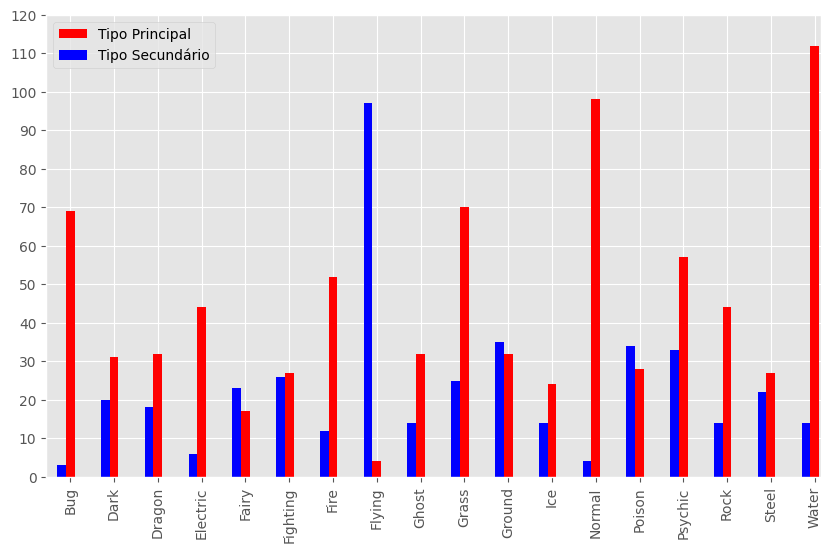

In [475]:
type1.plot.bar(width=0.2, color='red',label='Tipo Principal', grid=True, align='edge', position=1)
type2.plot.bar(width=0.2, color='blue',label='Tipo Secundário', grid=True, align='edge', position=2)
plt.yticks(np.arange(0, 130, 10))
plt.legend()
plt.show()

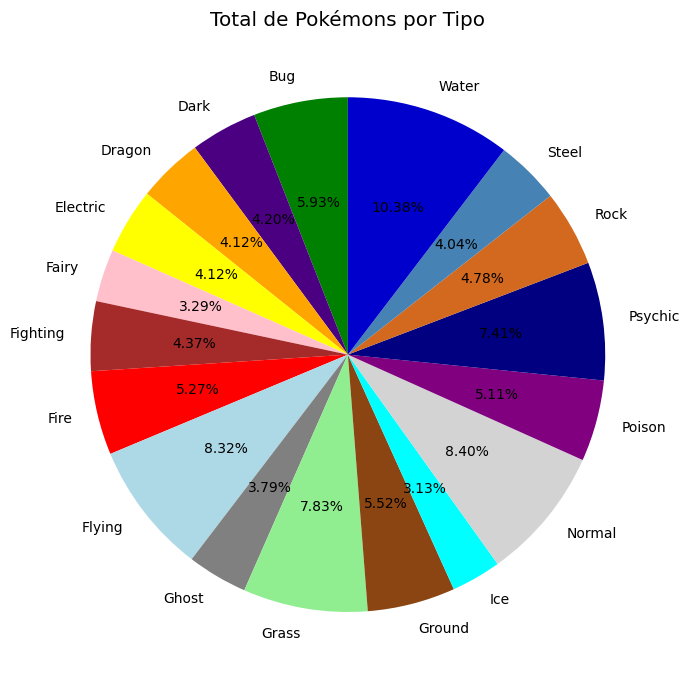

In [403]:
# Exibindo a quantidade total de Pokémons por tipo em porcentagem e gráfico de pizza
plt.style.use("ggplot")
total_types = pokemonData['Type 1'].value_counts() + pokemonData['Type 2'].value_counts()
total_types.sort_index(inplace=True)
total_types.plot(kind="pie", autopct="%.2f%%", colors = ['green','#4B0082','orange','yellow','pink','brown','red','lightblue','gray','lightgreen',
                                                         '#8B4513','#00FFFF','#D3D3D3','purple','#000080','#D2691E','#4682B4','#0000CD'], figsize=(7,7), startangle=90, title="Total de Pokémons por Tipo")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [404]:
# Definindo as gerações dos Pokémons
pokemonData.loc[pokemonData['Generation'] == 1, 'Generation'] = '1ª Geração'
pokemonData.loc[pokemonData['Generation'] == 2, 'Generation'] = '2ª Geração'
pokemonData.loc[pokemonData['Generation'] == 3, 'Generation'] = '3ª Geração'
pokemonData.loc[pokemonData['Generation'] == 4, 'Generation'] = '4ª Geração'
pokemonData.loc[pokemonData['Generation'] == 5, 'Generation'] = '5ª Geração'
pokemonData.loc[pokemonData['Generation'] == 6, 'Generation'] = '6ª Geração'

In [405]:
# Definindo se o Pokémon é Lendário
pokemonData.loc[pokemonData['Legendary'] == True, 'Legendary'] = 'Sim'
pokemonData.loc[pokemonData['Legendary'] == False, 'Legendary'] = 'Não'

In [406]:
# Top 8 Pokémons com mais HP (Pontos de Vida)
max_hp = pokemonData['HP'].max()
pokemon_max_hp = pokemonData[pokemonData['HP'] == max_hp]
pokemonData.fillna('-').sort_values(by='HP', ascending=False).head(8)[['Name', 'HP','Type 1','Type 2', 'Generation','Legendary']]

,Name,HP,Type 1,Type 2,Generation,Legendary
261,Blissey,255,Normal,-,2ª Geração,Não
121,Chansey,250,Normal,-,1ª Geração,Não
217,Wobbuffet,190,Psychic,-,2ª Geração,Não
351,Wailord,170,Water,-,3ª Geração,Não
655,Alomomola,165,Water,-,5ª Geração,Não
155,Snorlax,160,Normal,-,1ª Geração,Não
473,Drifblim,150,Ghost,Flying,4ª Geração,Não
313,Slaking,150,Normal,-,3ª Geração,Não


In [407]:
# Top 8 Pokémons com maior Ataque
max_attack = pokemonData['Attack'].max()
pokemon_max_attack = pokemonData[pokemonData['Attack'] == max_attack]
pokemonData.fillna('-').sort_values(by='Attack', ascending=False).head(8)[['Name', 'Attack','Type 1','Type 2', 'Generation','Legendary']]

,Name,Attack,Type 1,Type 2,Generation,Legendary
163,MewtwoMega Mewtwo X,190,Psychic,Fighting,1ª Geração,Sim
232,HeracrossMega Heracross,185,Bug,Fighting,2ª Geração,Não
424,GroudonPrimal Groudon,180,Ground,Fire,3ª Geração,Sim
426,RayquazaMega Rayquaza,180,Dragon,Flying,3ª Geração,Sim
429,DeoxysAttack Forme,180,Psychic,-,3ª Geração,Sim
711,KyuremBlack Kyurem,170,Dragon,Ice,5ª Geração,Sim
494,GarchompMega Garchomp,170,Dragon,Ground,4ª Geração,Não
527,GalladeMega Gallade,165,Psychic,Fighting,4ª Geração,Não


In [408]:
# Top 8 Pokémons com maior Defesa
max_defense = pokemonData['Defense'].max()
pokemon_max_defense = pokemonData[pokemonData['Defense'] == max_defense]
pokemonData.fillna('-').sort_values(by='Defense', ascending=False).head(8)[['Name', 'Defense','Type 1','Type 2', 'Generation','Legendary']]

,Name,Defense,Type 1,Type 2,Generation,Legendary
230,Shuckle,230,Bug,Rock,2ª Geração,Não
224,SteelixMega Steelix,230,Steel,Ground,2ª Geração,Não
333,AggronMega Aggron,230,Steel,-,3ª Geração,Não
223,Steelix,200,Steel,Ground,2ª Geração,Não
414,Regirock,200,Rock,-,3ª Geração,Sim
789,Avalugg,184,Ice,-,6ª Geração,Não
98,Cloyster,180,Water,Ice,1ª Geração,Não
87,SlowbroMega Slowbro,180,Water,Psychic,1ª Geração,Não


In [409]:
# Top 8 Pokémons com maior Velocidade
max_speed = pokemonData['Speed'].max()
pokemon_max_speed = pokemonData[pokemonData['Speed'] == max_speed]
pokemonData.fillna('-').sort_values(by='Speed', ascending=False).head(8)[['Name', 'Speed','Type 1','Type 2', 'Generation','Legendary']]

,Name,Speed,Type 1,Type 2,Generation,Legendary
431,DeoxysSpeed Forme,180,Psychic,-,3ª Geração,Sim
315,Ninjask,160,Bug,Flying,3ª Geração,Não
428,DeoxysNormal Forme,150,Psychic,-,3ª Geração,Sim
154,AerodactylMega Aerodactyl,150,Rock,Flying,1ª Geração,Não
71,AlakazamMega Alakazam,150,Psychic,-,1ª Geração,Não
429,DeoxysAttack Forme,150,Psychic,-,3ª Geração,Sim
19,BeedrillMega Beedrill,145,Bug,Poison,1ª Geração,Não
275,SceptileMega Sceptile,145,Grass,Dragon,3ª Geração,Não


In [410]:
# Realizando a média de Ataque por Tipo Principal
type_attack = dict()

for types, attack in zip(pokemonData['Type 1'], pokemonData['Attack']):
  if types in type_attack:
        type_attack[types] += attack
  else:
        type_attack[types] = attack

for types in type_attack:
    type_attack[types] = type_attack[types] / pokemonData[pokemonData['Type 1'] == types].shape[0]

In [411]:
# Tabelando os dados
df = pd.DataFrame(list(type_attack.items()), columns=['Type', 'Average Attack'])
df.sort_values('Average Attack', ascending=False).reset_index(drop=True)

,Type,Average Attack
0,Dragon,112.125000
1,Fighting,96.777778
2,Ground,95.750000
3,Rock,92.863636
4,Steel,92.703704
5,Dark,88.387097
6,Fire,84.769231
7,Flying,78.750000
8,Poison,74.678571
9,Water,74.151786


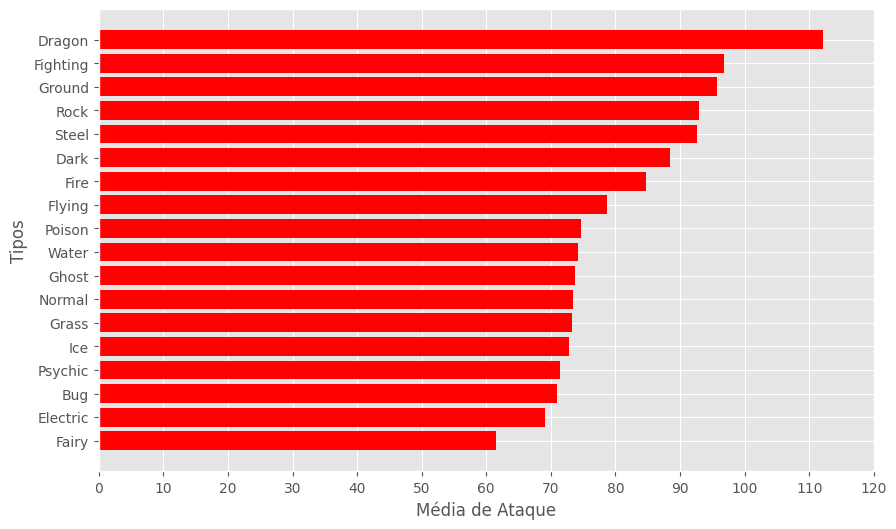

In [412]:
# Obtendo os dados e exibindo-os em gráfico de colunas
plt.style.use("ggplot")
all_types = list(type_attack.keys())
attack_average = list(type_attack.values())

# Ordenando o gráfico do maior para o menor
type_attack_list = list(zip(all_types, attack_average))
type_attack_list_sorted = sorted(type_attack_list, key=lambda t:t[1])
all_types, attack_average = zip(*type_attack_list_sorted)

plt.barh(all_types, attack_average, color='red')
plt.xlabel('Média de Ataque')
plt.ylabel('Tipos')
plt.xticks(np.arange(0, 130, 10))
plt.show()

In [413]:
# Realizando a média de Defesa por Tipo Principal
type_defense = dict()

for types, defense in zip(pokemonData['Type 1'], pokemonData['Defense']):
  if types in type_defense:
        type_defense[types] += defense
  else:
        type_defense[types] = defense

for types in type_defense:
    type_defense[types] = type_defense[types] / pokemonData[pokemonData['Type 1'] == types].shape[0]

In [414]:
# Tabelando os dados
df = pd.DataFrame(list(type_defense.items()), columns=['Type', 'Average Defense'])
df.sort_values('Average Defense', ascending=False).reset_index(drop=True)

,Type,Average Defense
0,Steel,126.370370
1,Rock,100.795455
2,Dragon,86.375000
3,Ground,84.843750
4,Ghost,81.187500
5,Water,72.946429
6,Ice,71.416667
7,Grass,70.800000
8,Bug,70.724638
9,Dark,70.225806


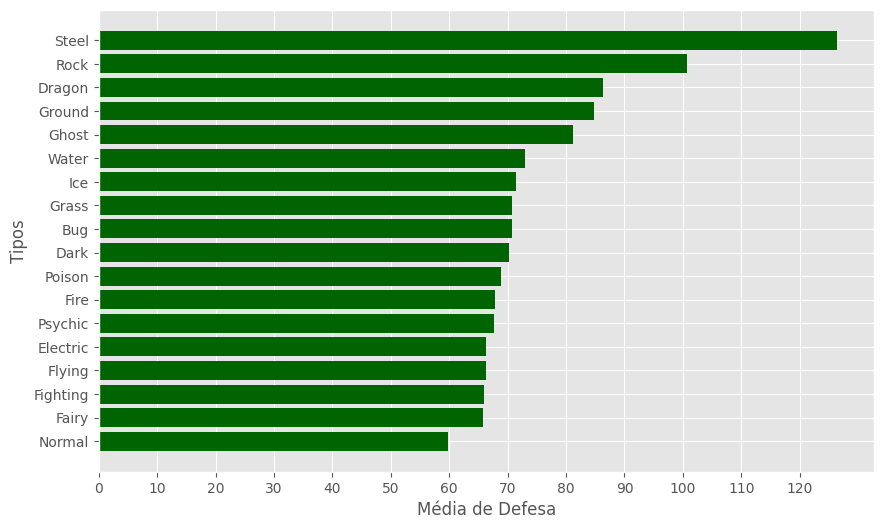

In [415]:
# Obtendo os dados e exibindo-os em gráfico de colunas
plt.style.use("ggplot")
all_types = list(type_defense.keys())
defense_average = list(type_defense.values())

# Ordenando o gráfico do maior para o menor
type_defense_list = list(zip(all_types, defense_average))
type_defense_list_sorted = sorted(type_defense_list, key=lambda t:t[1])
all_types, defense_average = zip(*type_defense_list_sorted)

plt.barh(all_types, defense_average, color='darkgreen')
plt.xlabel('Média de Defesa')
plt.ylabel('Tipos')
plt.xticks(np.arange(0, 130, 10))
plt.show()

In [416]:
# Realizando a média de HP (Pontos de Vida) por Tipo Principal
type_hp = dict()

for types, hp in zip(pokemonData['Type 1'], pokemonData['HP']):
  if types in type_hp:
        type_hp[types] += hp
  else:
        type_hp[types] = hp

for types in type_hp:
    type_hp[types] = type_hp[types] / pokemonData[pokemonData['Type 1'] == types].shape[0]

In [417]:
# Tabelando os dados
df = pd.DataFrame(list(type_hp.items()), columns=['Type', 'Average HP'])
df.sort_values('Average HP', ascending=False).reset_index(drop=True)

,Type,Average HP
0,Dragon,83.312500
1,Normal,77.275510
2,Fairy,74.117647
3,Ground,73.781250
4,Water,72.062500
5,Ice,72.000000
6,Flying,70.750000
7,Psychic,70.631579
8,Fire,69.903846
9,Fighting,69.851852


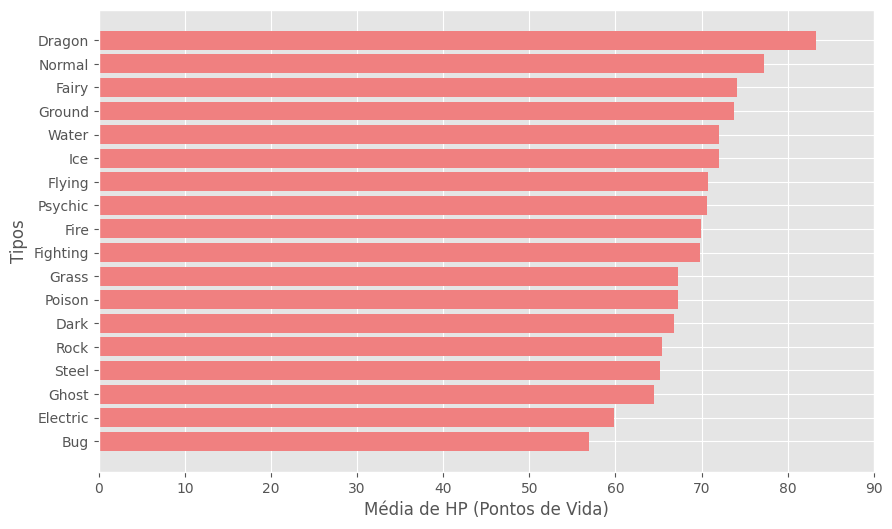

In [418]:
# Obtendo os dados e exibindo-os em gráfico de colunas
plt.style.use("ggplot")
all_types = list(type_hp.keys())
hp_average = list(type_hp.values())

# Ordenando o gráfico do maior para o menor
type_hp_list = list(zip(all_types, hp_average))
type_hp_list_sorted = sorted(type_hp_list, key=lambda t:t[1])
all_types, hp_average = zip(*type_hp_list_sorted)

plt.barh(all_types, hp_average, color='#F08080')
plt.xlabel('Média de HP (Pontos de Vida)')
plt.ylabel('Tipos')
plt.xticks(np.arange(0, 100, 10))
plt.show()

In [419]:
# Realizando a média de Velocidade por Tipo Principal
type_speed = dict()

for types, speed in zip(pokemonData['Type 1'], pokemonData['Speed']):
  if types in type_speed:
        type_speed[types] += speed
  else:
        type_speed[types] = speed

for types in type_speed:
    type_speed[types] = type_speed[types] / pokemonData[pokemonData['Type 1'] == types].shape[0]

In [420]:
# Tabelando os dados
df = pd.DataFrame(list(type_speed.items()), columns=['Type', 'Average Speed'])
df.sort_values('Average Speed', ascending=False).reset_index(drop=True)

,Type,Average Speed
0,Flying,102.500000
1,Electric,84.500000
2,Dragon,83.031250
3,Psychic,81.491228
4,Dark,76.161290
5,Fire,74.442308
6,Normal,71.551020
7,Fighting,66.074074
8,Water,65.964286
9,Ghost,64.343750


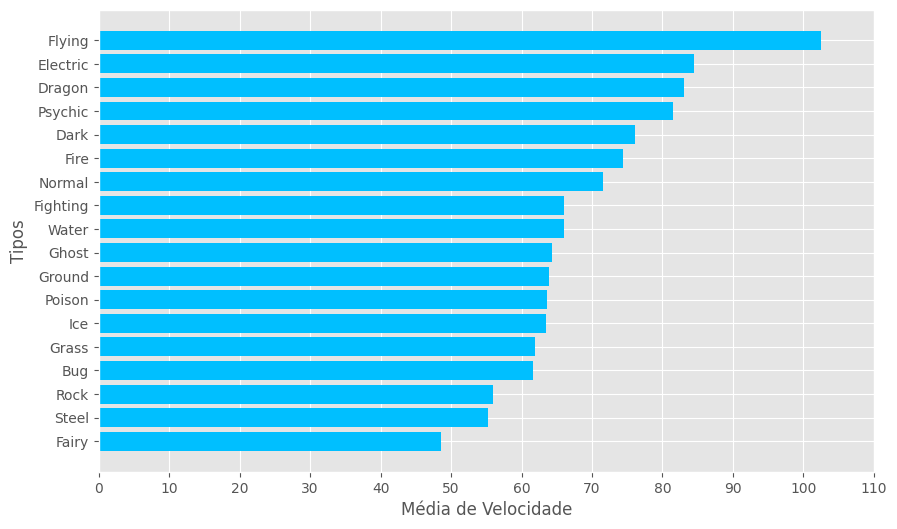

In [421]:
# Obtendo os dados e exibindo-os em gráfico de colunas
plt.style.use("ggplot")
all_types = list(type_speed.keys())
speed_average = list(type_speed.values())

# Ordenando o gráfico do maior para o menor
type_speed_list = list(zip(all_types, speed_average))
type_speed_list_sorted = sorted(type_speed_list, key=lambda t:t[1])
all_types, speed_average = zip(*type_speed_list_sorted)

plt.barh(all_types, speed_average, color='#00BFFF')
plt.xlabel('Média de Velocidade')
plt.ylabel('Tipos')
plt.xticks(np.arange(0, 120, 10))
plt.show()

## Verificando se a Velocidade dos Pokémons influenciam em um valor de Ataque maior.

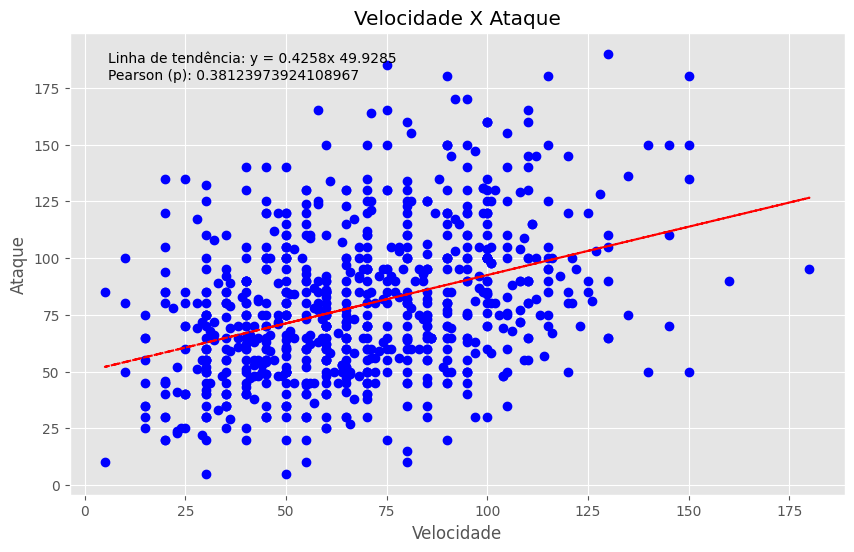

In [422]:
# Definição de x e y 
x = np.array(pokemonData['Speed'])
y = np.array(pokemonData['Attack'])

# Gera a equação para a linha linear (Regressão linear)
equação = np.polyfit(x, y, 1)

# Captura a correlação entre os dois valores
correlação = np.corrcoef(x,y)[0][1]
# Cria a linha de tendência
linha_tendencia = np.poly1d(equação)

# Monta o texto para apresenta os resultados dentro do gráfico
texto = f'Linha de tendência: y = {equação[0]:.4f}x {equação[1]:.4f}'
texto += f'\nPearson (p): {correlação}'

# Define o tamanho da figura em polegadas
#plt.figure(figsize=(6,5)) 

plt.title("Velocidade X Ataque")
plt.xlabel("Velocidade")
plt.ylabel("Ataque")

plt.text(0.05, 0.9, texto, 
         transform=plt.gca().transAxes)
plt.plot(x, y, 'ob')
plt.plot(x, linha_tendencia(x), 'r--')

plt.show()

## Verificando se a Velocidade dos Pokémons influenciam em um valor de Defesa maior.

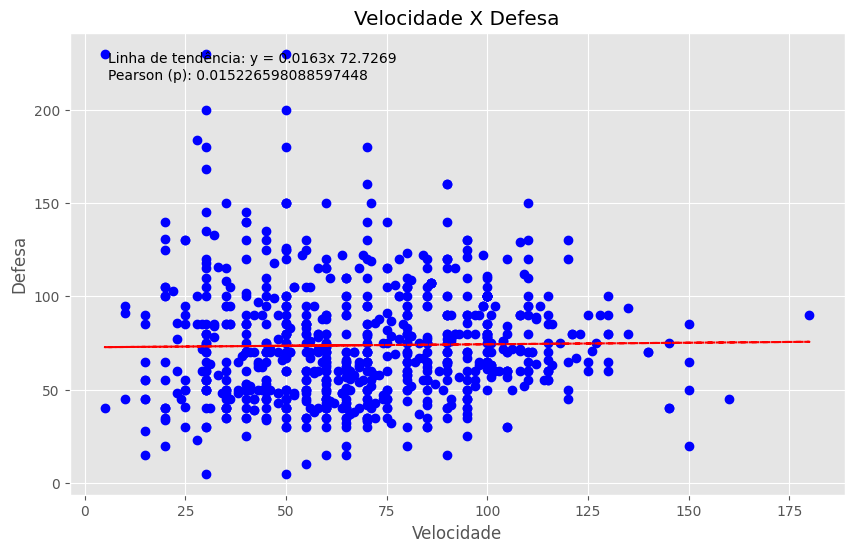

In [423]:
# Definição de x e y 
x = np.array(pokemonData['Speed'])
y = np.array(pokemonData['Defense'])

# Gera a equação para a linha linear (Regressão linear)
equação = np.polyfit(x, y, 1)

# Captura a correlação entre os dois valores
correlação = np.corrcoef(x,y)[0][1]
# Cria a linha de tendência
linha_tendencia = np.poly1d(equação)

# Monta o texto para apresenta os resultados dentro do gráfico
texto = f'Linha de tendência: y = {equação[0]:.4f}x {equação[1]:.4f}'
texto += f'\nPearson (p): {correlação}'

# Define o tamanho da figura em polegadas
#plt.figure(figsize=(6,5)) 

plt.title("Velocidade X Defesa")
plt.xlabel("Velocidade")
plt.ylabel("Defesa")

plt.text(0.05, 0.9, texto, 
         transform=plt.gca().transAxes)
plt.plot(x, y, 'ob')
plt.plot(x, linha_tendencia(x), 'r--')

plt.show()